In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rashadrmammadov/customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rashadrmammadov/customer-churn-dataset/versions/1


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:



# List all files in the directory
files = os.listdir(path)
print("Files in dataset directory:", files)

# Assuming the dataset contains a CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]  # Get the first CSV file
csv_path = os.path.join(path, csv_file)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()


Files in dataset directory: ['customer_churn_data.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [5]:
df.drop(columns=['gender',	'SeniorCitizen',	'Partner',	'Dependents',		'PhoneService',	'MultipleLines',		'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV'	,'StreamingMovies',		'PaperlessBilling'	,'PaymentMethod'],inplace=True)

In [6]:
df.head()

,customerID,tenure,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,CUST0000,23,No,Month-to-month,49.85,1146.55,No
1,CUST0001,43,DSL,Month-to-month,100.70,4330.10,Yes
2,CUST0002,51,DSL,One year,97.33,4963.83,Yes
3,CUST0003,72,DSL,Month-to-month,101.38,7299.36,No
4,CUST0004,25,DSL,Month-to-month,52.22,1305.50,Yes


In [7]:
len(df)

5880

In [8]:
df['Churn'].value_counts()

,count
Churn,
No,2982
Yes,2898


<Axes: xlabel='Churn', ylabel='count'>

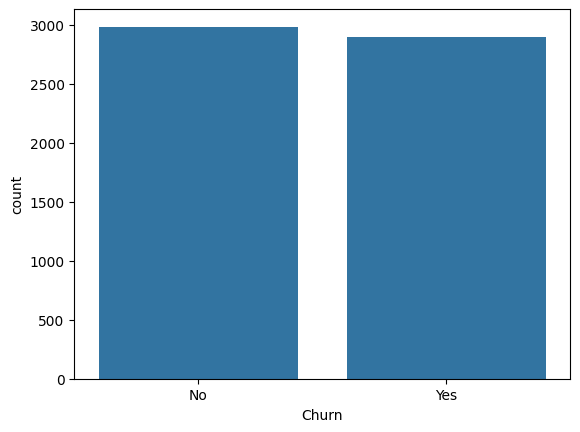

In [9]:
sns.barplot(x=df['Churn'].value_counts().index,y=df['Churn'].value_counts())

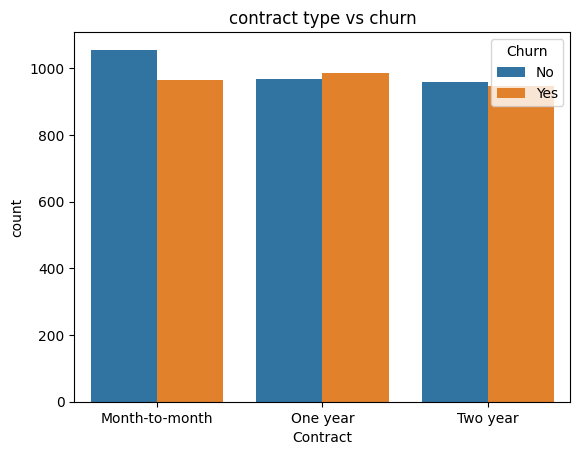

In [10]:
sns.countplot(data=df, x='Contract', hue='Churn',)
plt.title("contract type vs churn")
plt.show()


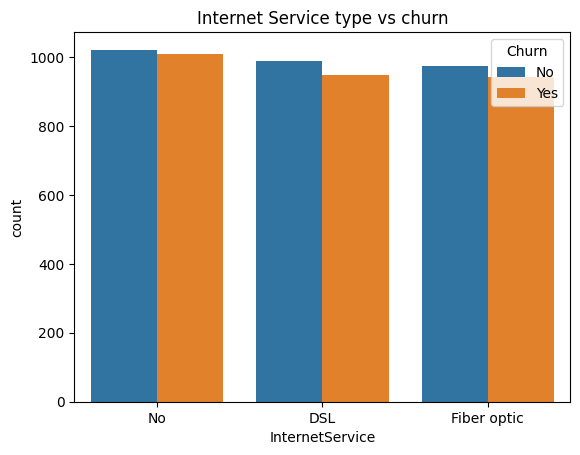

In [11]:
sns.countplot(data=df, x='InternetService', hue='Churn',)
plt.title("Internet Service type vs churn")
plt.show()


In [12]:
df.describe()


,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000
mean,36.549150,70.157779,2566.813165
std,20.909674,28.804615,1910.017743
min,1.000000,20.000000,20.030000
25%,18.000000,45.717500,1020.217500
50%,37.000000,70.155000,2136.445000
75%,55.000000,95.457500,3767.665000
max,72.000000,119.990000,8589.600000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       5880 non-null   object 
 1   tenure           5880 non-null   int64  
 2   InternetService  5880 non-null   object 
 3   Contract         5880 non-null   object 
 4   MonthlyCharges   5880 non-null   float64
 5   TotalCharges     5880 non-null   float64
 6   Churn            5880 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 321.7+ KB


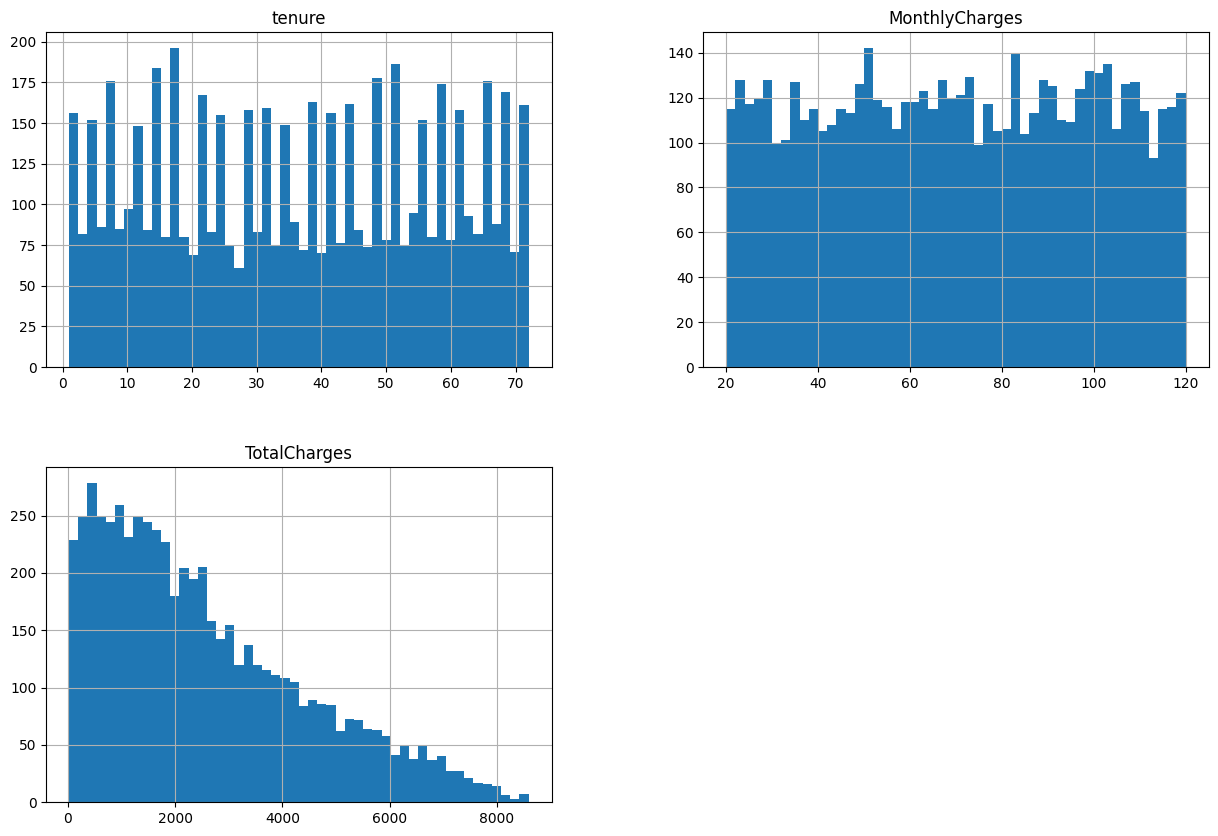

In [14]:
df.hist(figsize=(15,10),bins=50)
plt.show()

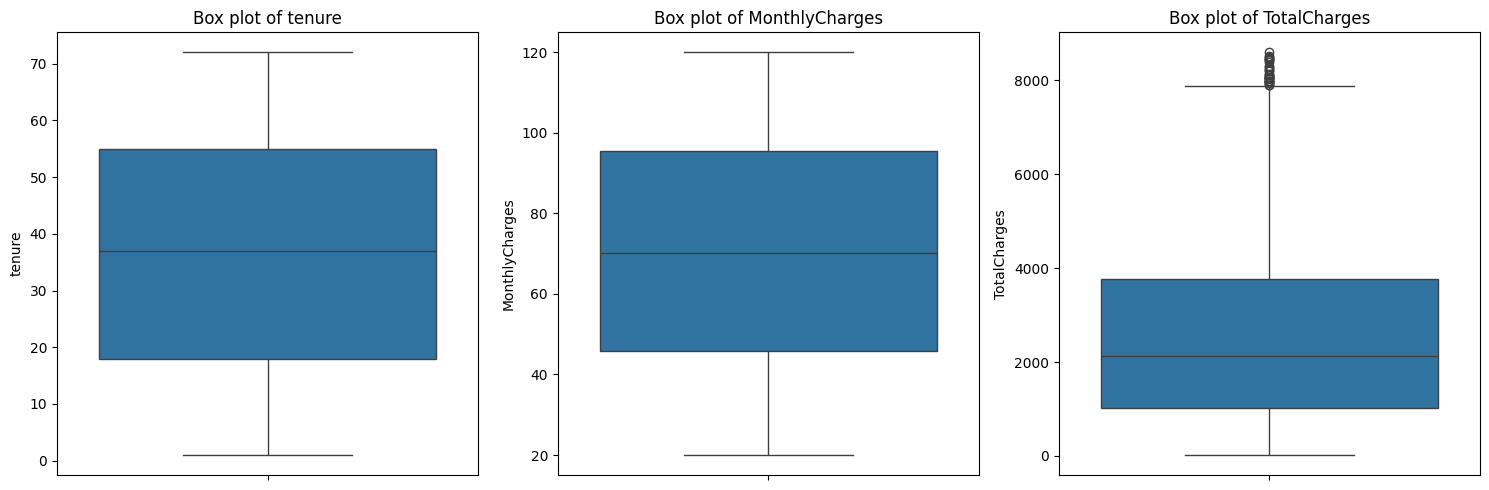

In [15]:

# Function to plot box plots to check for outliers
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(data=df, y=column)
        plt.title(f"Box plot of {column}")
    plt.tight_layout()
    plt.show()

# Plot box plots for the cleaned dataset
columns_to_check = ['tenure',	'MonthlyCharges',	'TotalCharges']
plot_boxplots(df, columns_to_check)


In [16]:
print("Original dataset size:", df.shape)

Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df = df[(df['TotalCharges'] >= lower_bound) & (df['TotalCharges'] <= upper_bound)]

print("Cleaned dataset size:", df.shape)


Original dataset size: (5880, 7)
Cleaned dataset size: (5848, 7)


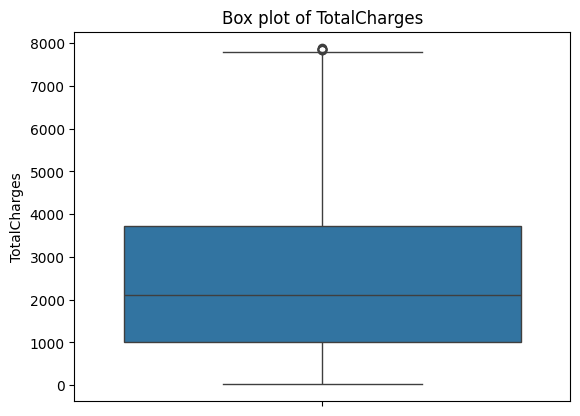

In [17]:
sns.boxplot(data=df, y='TotalCharges')
plt.title(f"Box plot of TotalCharges")
plt.show()

In [18]:
display(df['InternetService'].value_counts())
df['Contract'].value_counts()

,count
InternetService,
No,2022
DSL,1924
Fiber optic,1902


,count
Contract,
Month-to-month,2010
One year,1945
Two year,1893


In [19]:
len(df['customerID'].unique())

5848

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


In [21]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [22]:
data = pd.get_dummies(df, columns=['InternetService','Contract'], drop_first=True)


In [23]:
data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,CUST0000,23,49.85,1146.55,0,False,True,False,False
1,CUST0001,43,100.70,4330.10,1,False,False,False,False
2,CUST0002,51,97.33,4963.83,1,False,False,True,False
3,CUST0003,72,101.38,7299.36,0,False,False,False,False
4,CUST0004,25,52.22,1305.50,1,False,False,False,False


In [24]:
X = data.drop(columns=['Churn','customerID'])
y = data['Churn']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
y_test.value_counts()

,count
Churn,
0,593
1,577


In [27]:


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_pred= pipeline.predict(X_test)

print('test acuracy ',pipeline.score(X_test,y_test))
print('test acuracy ',pipeline.score(X_train,y_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

test acuracy  0.517948717948718
test acuracy  0.5138948268490808
[[316 277]
 [287 290]]
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       593
           1       0.51      0.50      0.51       577

    accuracy                           0.52      1170
   macro avg       0.52      0.52      0.52      1170
weighted avg       0.52      0.52      0.52      1170



In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Training and evaluating each model
for name, model in models.items():
    print(f"Model: {name}")
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Confusion Matrix:
[[409 184]
 [380 197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59       593
           1       0.52      0.34      0.41       577

    accuracy                           0.52      1170
   macro avg       0.52      0.52      0.50      1170
weighted avg       0.52      0.52      0.50      1170

--------------------------------------------------
Model: Random Forest
Confusion Matrix:
[[332 261]
 [295 282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       593
           1       0.52      0.49      0.50       577

    accuracy                           0.52      1170
   macro avg       0.52      0.52      0.52      1170
weighted avg       0.52      0.52      0.52      1170

--------------------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[[312 281]
 [286 291

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:41:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('random_forest', RandomForestClassifier(class_weight='balanced', n_estimators=200))  # Fix the key and value pair here
])

# Step 2: Fit the model
pipeline.fit(X_train, y_train)

# Step 3: Predict and evaluate
y_pred = pipeline.predict(X_test)

# Step 4: Print the evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[324 269]
 [291 286]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       593
           1       0.52      0.50      0.51       577

    accuracy                           0.52      1170
   macro avg       0.52      0.52      0.52      1170
weighted avg       0.52      0.52      0.52      1170



In [30]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'solver': 'liblinear'}


In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


In [32]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.5196581196581197
Confusion Matrix:
 [[410 183]
 [379 198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.69      0.59       593
           1       0.52      0.34      0.41       577

    accuracy                           0.52      1170
   macro avg       0.52      0.52      0.50      1170
weighted avg       0.52      0.52      0.50      1170

